In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xlsxwriter
import pylab as pl
import matplotlib.ticker as ticker
from openpyxl import load_workbook
%matplotlib inline

In [2]:
data = pd.read_csv('TATN1day1.csv', sep = ',')
data

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,TATN,D,20170103,0,426.45,447.85,424.55,445.20,1272240
1,TATN,D,20170104,0,444.85,446.40,434.10,446.40,1195220
2,TATN,D,20170105,0,445.60,448.65,418.25,424.25,2121160
3,TATN,D,20170106,0,420.75,426.80,415.50,423.45,801450
4,TATN,D,20170109,0,425.15,426.45,418.20,425.80,889110
...,...,...,...,...,...,...,...,...,...
955,TATN,D,20201016,0,432.40,433.80,426.20,429.20,4213273
956,TATN,D,20201019,0,430.70,432.80,414.90,415.70,3847080
957,TATN,D,20201020,0,415.70,424.80,406.40,421.20,7552688
958,TATN,D,20201021,0,421.70,428.60,416.10,416.90,5154493


In [3]:
#Избавляемся от ненужных столбцов
data.drop('<OPEN>', axis = 1, inplace = True)
data.drop('<HIGH>', axis = 1, inplace = True)
data.drop('<LOW>', axis = 1, inplace = True)
data.drop('<VOL>', axis = 1, inplace = True)
data.drop('<PER>', axis = 1, inplace = True)
data.drop('<TICKER>', axis = 1, inplace = True)
data.drop('<TIME>', axis = 1, inplace = True)
#Добавляем нужные нам столбцы
data['data_year'] = 0
data['long'] = 0
data['short'] = 0
data['long exit'] = 0
data['short exit'] = 0
data['position'] = 0
data[''] = 0
data[''] = data[''].astype('float64') #Этот стобец требуется нам в типе float
data['Сделка'] = np.nan
data['Дневная доходность'] = 0
data['Дневная доходность'] = data['Дневная доходность'].astype('float64')
data['equity'] = 0
data['equity'] = data['equity'].astype('float64')
data['drawdown'] = 0
data['drawdown'] = data['drawdown'].astype('float64')
data['<DATE>'] = data['<DATE>'].astype('str')
data['<DATE>'] = pd.to_datetime(data['<DATE>']) #Так же не лишним будет изменить тип данных столбца <DATE>
data

,<DATE>,<CLOSE>,data_year,long,short,long exit,short exit,position,,Сделка,Дневная доходность,equity,drawdown
0,2017-01-03,445.20,0,0,0,0,0,0,0.0,NaN,0.0,0.0,0.0
1,2017-01-04,446.40,0,0,0,0,0,0,0.0,NaN,0.0,0.0,0.0
2,2017-01-05,424.25,0,0,0,0,0,0,0.0,NaN,0.0,0.0,0.0
3,2017-01-06,423.45,0,0,0,0,0,0,0.0,NaN,0.0,0.0,0.0
4,2017-01-09,425.80,0,0,0,0,0,0,0.0,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2020-10-16,429.20,0,0,0,0,0,0,0.0,NaN,0.0,0.0,0.0
956,2020-10-19,415.70,0,0,0,0,0,0,0.0,NaN,0.0,0.0,0.0
957,2020-10-20,421.20,0,0,0,0,0,0,0.0,NaN,0.0,0.0,0.0
958,2020-10-21,416.90,0,0,0,0,0,0,0.0,NaN,0.0,0.0,0.0


In [4]:
data.dtypes#Проверим типы данных в столбцах

<DATE>                datetime64[ns]
<CLOSE>                      float64
data_year                      int64
long                           int64
short                          int64
long exit                      int64
short exit                     int64
position                       int64
                             float64
Сделка                       float64
Дневная доходность           float64
equity                       float64
drawdown                     float64
dtype: object

In [5]:
#Заносим информацию в столбцах в numpy массивы

data_year = np.array(data['data_year'])
close = np.array(data['<CLOSE>'])
long = np.array(data['long'])
short = np.array(data['short'])
long_exit = np.array(data['long exit'])
short_exit = np.array(data['short exit'])
position = np.array(data['position'])
money =np.array(data[''])
transaction = np.array(data['Сделка'])
day_incomes =np.array(data['Дневная доходность'])
equity = np.array(data['equity'])
equity[0] = 100
drawdown = np.array(data['drawdown'])

In [6]:
#Сам алгоритм
for i in range(2,len(close)):
    #long
    if close[i-2] < close[i-1] < close[i] and position[i-1] == 0:
        long[i] = 1
    else:
        long[i] = 0
    #short
    if close[i-2] > close[i-1] > close[i] and position[i-1] == 0:
        short[i] = 1
    else:
        short[i] = 0
    #long exit
    if close[i-2] > close[i-1] > close[i] and position[i-1] == 1:
        long_exit[i] = 1
    else:
        long_exit[i] = 0
    #short exit
    if close[i-2] < close[i-1] < close[i] and position[i-1] == -1:
        short_exit[i] = 1
    else:
        short_exit[i] = 0
    #position
    if position[i-1] == 0:
        position[i] = long[i] - short[i]
    elif long_exit[i] + short_exit[i] == 1:
        position[i] = 0
    else:
        position[i] = position[i-1]
    #Pustoi stolb
    if position[i-1] == 0 and position[i] == 0:
        money[i] = 0
    elif position[i-1] == position[i]:
        money[i] = money[i-1]
    else:
        money[i] = close[i]
    #Сделка
    if position[i-1] != 0 and position[i-1] != position[i]:
        transaction[i] = (money[i]/money[i-1] - 1) * position[i-1]
    if position[i-1] != 0:
        day_incomes[i] = (close[i] / close[i-1] - 1) * position[i-1]
    else:
        day_incomes[i] = 0
        
#Следущие столбцы мы не заполняли в цикле выше, так как equity нам нужно заполнять с первого номера
#drawdown зависит от значений equity, а datayear нам нужно заполнять с нулевого номера

#equity
for i in range(1,len(close)):
    equity[i] =(1+day_incomes[i])*equity[i-1]
#drawdown
for i in range(2,len(close)):
    drawdown[i] = equity[i]/max(equity[0:i])-1
#datayear
for i in range(0,len(close)):
    data_year[i] = data['<DATE>'][i].year

data['data_year'] = data_year
data['long'] = long
data['short'] = short
data['long exit'] = long_exit
data['short exit'] = short_exit 
data['position'] = position
data[''] = money
data['Сделка'] = transaction * 100
data['Дневная доходность'] = day_incomes * 100
data['equity'] = equity
data['drawdown']= drawdown*100
data.head(20) # Выведем первые 20 значений, чтобы проверить правильность работы алгоритма

,<DATE>,<CLOSE>,data_year,long,short,long exit,short exit,position,,Сделка,Дневная доходность,equity,drawdown
0,2017-01-03,445.20,2017,0,0,0,0,0,0.00,NaN,0.000000,100.000000,0.000000
1,2017-01-04,446.40,2017,0,0,0,0,0,0.00,NaN,0.000000,100.000000,0.000000
2,2017-01-05,424.25,2017,0,0,0,0,0,0.00,NaN,0.000000,100.000000,0.000000
3,2017-01-06,423.45,2017,0,1,0,0,-1,423.45,NaN,0.000000,100.000000,0.000000
4,2017-01-09,425.80,2017,0,0,0,0,-1,423.45,NaN,-0.554965,99.445035,-0.554965
5,2017-01-10,428.60,2017,0,0,0,1,0,428.60,-1.216200,-0.657586,98.791098,-1.208902
6,2017-01-11,431.25,2017,1,0,0,0,1,431.25,NaN,0.000000,98.791098,-1.208902
7,2017-01-12,438.00,2017,0,0,0,0,1,431.25,NaN,1.565217,100.337394,0.337394
8,2017-01-13,433.10,2017,0,0,0,0,1,431.25,NaN,-1.118721,99.214898,-1.118721
9,2017-01-16,427.25,2017,0,0,1,0,0,427.25,-0.927536,-1.350727,97.874775,-2.454338


In [7]:
# КАК РАБОТАЕТ ЭТА ФУНКЦИЯ
#1)Значение year = значнию слева в таблице
#2)возвращает самое большое значение equity, у которой год равен year 
#деленное на значение equity соответствующего строке, номер которой равен максимальному значению из 2 и 
# номером столбца первого появившегося значения year минус 1
def profit(year, equity, data_year,):
    first = False
    equitymin = 1
    for i in range(0,len(data_year)):
        if data_year[i] == year:
            if first == False:
                firstdatayearcolumn = i - 1                                         
                first = True
            if equity[i] < equitymin:
                equitymax = equity[i]
    equity_index = max(2, firstdatayearcolumn)
    result = equitymax / equity[equity_index] - 1
    return result*100


In [8]:
#Алгоритм подсчёта прибыльных, нулевых и отрицательных сделок
uncurrent_digit = 0
minus_digit = 0
overage_digit = 0
zero_transaction = 0
geom_mean_digit = 1
for i in range(2,len(transaction)):
    if transaction[i] > 0:
        uncurrent_digit += 1
    elif transaction[i] < 0:
        minus_digit += 1
    elif transaction[i] == 0:
        zero_transaction += 1
        
        
data2 = pd.DataFrame() # Создадим новую таблицу, чтобы вывести её на новом листе в Excel

# Алгоритм для нахождения значний для 2017, 2018, 2019 и 2020 годов
#Первый год

year = min(data['<DATE>']).year

#Значние для первого года

lineyear =  {'Name': year, 'Значение':profit(year,equity/100, data_year)}

#Числитель для подсчёта среднеарифметического

numerator_sum = profit(year,equity/100, data_year)

#Числитель для подсчёта среднегеометрического

numerator_composition = numerator_sum

#Знаменатель для подсчёта среднеарифметического 

denuminator = (((data['<DATE>'][len(data['<DATE>'])-1] - data['<DATE>'][0]) / 365).total_seconds()) / 86400

data2 = data2.append(lineyear, ignore_index = True)

# Далее выполняется подсчёт для всех остальных годов
while(year < max(data['<DATE>']).year):
    year += 1
    numerator_sum += profit(year,equity/100, data_year)
    numerator_composition *= profit(year,equity/100, data_year)
    line_year =  {'Name': year,'Значение':profit(year,equity /100, data_year)}
    data2 = data2.append(line_year, ignore_index = True)
    
#Вычисляем среднеарифметическое и среднегеометрическое

overage_digit = numerator_sum / denuminator
if numerator_composition < 0:
    geom_mean_digit = -pow(-numerator_composition,(1/denuminator))
else:
    geom_mean_digit = pow(numerator_composition,(1/denuminator))


In [9]:
#Заносим в таблицу
income = {'Name':'Доходность с реинвест', 'Значение' : denuminator}
sum_deal = {'Name':'Количество сделок', 'Значение': uncurrent_digit + minus_digit}
pros_profit = {'Name':'% приб.сделок','Значение': uncurrent_digit/(uncurrent_digit + minus_digit) * 100}
pribiln = {'Name':'Приб.сделок','Значение': uncurrent_digit}
minus = {'Name':'Отр.сделок','Значение': minus_digit}
zero = {'Name':'Нулевых сделок', 'Значение': zero_transaction}
total_days = {'Name':'Количество дней', 'Значение': data['<DATE>'][len(data['<DATE>'])-1] - data['<DATE>'][0]}
overage = {'Name':'Среднеарифметическая доходность', 'Значение' :overage_digit}
geom_mean = {'Name':'Среднегеометрическая доходность','Значение' :geom_mean_digit}

data2 = data2.append(income, ignore_index = True)
data2 = data2.append(overage, ignore_index = True)
data2 = data2.append(geom_mean, ignore_index = True)
data2 = data2.append(sum_deal, ignore_index = True)
data2 = data2.append(pros_profit, ignore_index = True)
data2 = data2.append(pribiln, ignore_index = True)
data2 = data2.append(minus, ignore_index = True)
data2 = data2.append(zero, ignore_index = True)
data2 = data2.append(total_days, ignore_index = True)
data2

,Name,Значение
0,2017,-7.81997
1,2018,-5.05033
2,2019,11.6827
3,2020,-40.3984
4,Доходность с реинвест,3.80274
5,Среднеарифметическая доходность,-10.9358
6,Среднегеометрическая доходность,-13.2736
7,Количество сделок,114
8,% приб.сделок,39.4737
9,Приб.сделок,45


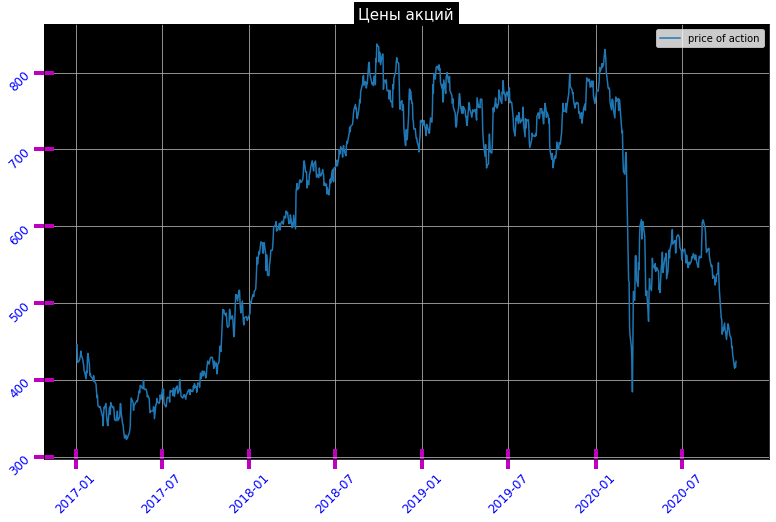

In [30]:
#График зависимости даты и цен акций
fig, ax = plt.subplots()
ax.plot( data['<DATE>'], data['<CLOSE>'] , label='price of action')
ax.legend()
ax.grid(True)
#Заголовок
ax.set_title('Цены акций',                  
             fontsize = 15,
             color = 'white',
             backgroundcolor = 'black')
ax.set_facecolor('black')

ax.tick_params(axis = 'both',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'inout',    #  Рисуем деления внутри и снаружи графика
               length = 20,    #  Длинна делений
               width = 4,     #  Ширина делений
               color = 'm',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 12,    #  Размер подписи
               labelcolor = 'b',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               #top = True,    #   сверху
               left = True,    #  слева
               #right = True,    #  и справа
               labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 45)    #  Поворот подписей
fig.set_figwidth(13) # Размеры 
fig.set_figheight(8) # графика
plt.savefig('price_of_action.png') # Сохраняем график в png, чтобы потом его вставить в excel

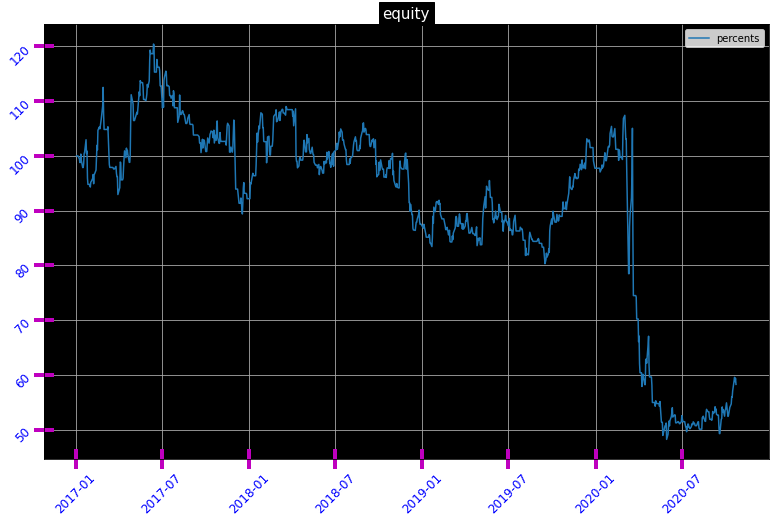

In [28]:
#График зависимости даты и цен акций
fig, ax = plt.subplots()
ax.plot( data['<DATE>'], data['equity'] , label='percents')
ax.legend()
ax.grid(True)
ax.set_title('equity',                  
             fontsize = 15,
             color = 'white',
             backgroundcolor = 'black')
ax.set_facecolor('black')

ax.tick_params(axis = 'both',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'inout',    #  Рисуем деления внутри и снаружи графика
               length = 20,    #  Длинна делений
               width = 4,     #  Ширина делений
               color = 'm',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 12,    #  Размер подписи
               labelcolor = 'b',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               #top = True,    #   сверху
               left = True,    #  слева
               #right = True,    #  и справа
               labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 45)  
fig.set_figwidth(13) # Размеры 
fig.set_figheight(8) # графика
plt.savefig('equity.png') # Сохраняем график в png, чтобы потом его вставить в excel

In [31]:
#Выведем наши DataFrame и графики в Excel


writer = pd.ExcelWriter('example.xlsx', engine='xlsxwriter')

data.to_excel(writer, 'Sheet1')
 
data2.to_excel(writer, 'Sheet2')

workbook  = writer.book

worksheet = workbook.get_worksheet_by_name('Sheet2')

worksheet.insert_image('E1', 'price_of_action.png')

worksheet.insert_image('E40', 'equity.png')

writer.save()